In [46]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_norm_drop.xlsx")


In [47]:
data_main

,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,0.0,0.260917,0.242424
635,635,0.0,0.260917,0.242424


In [48]:
data

,Unnamed: 0,FORCE_B(Right),X_COR_C(Left),FSR_C(Left)
0,0,0.0,0.199050,0.272727
1,1,0.0,0.199050,0.242424
2,2,0.0,0.199050,0.212121
3,3,0.0,0.199050,0.181818
4,4,0.0,0.199050,0.181818
...,...,...,...,...
632,632,0.0,0.260917,0.212121
633,633,0.0,0.260917,0.242424
634,634,NaN,NaN,NaN
635,635,0.0,0.260917,0.242424


In [49]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

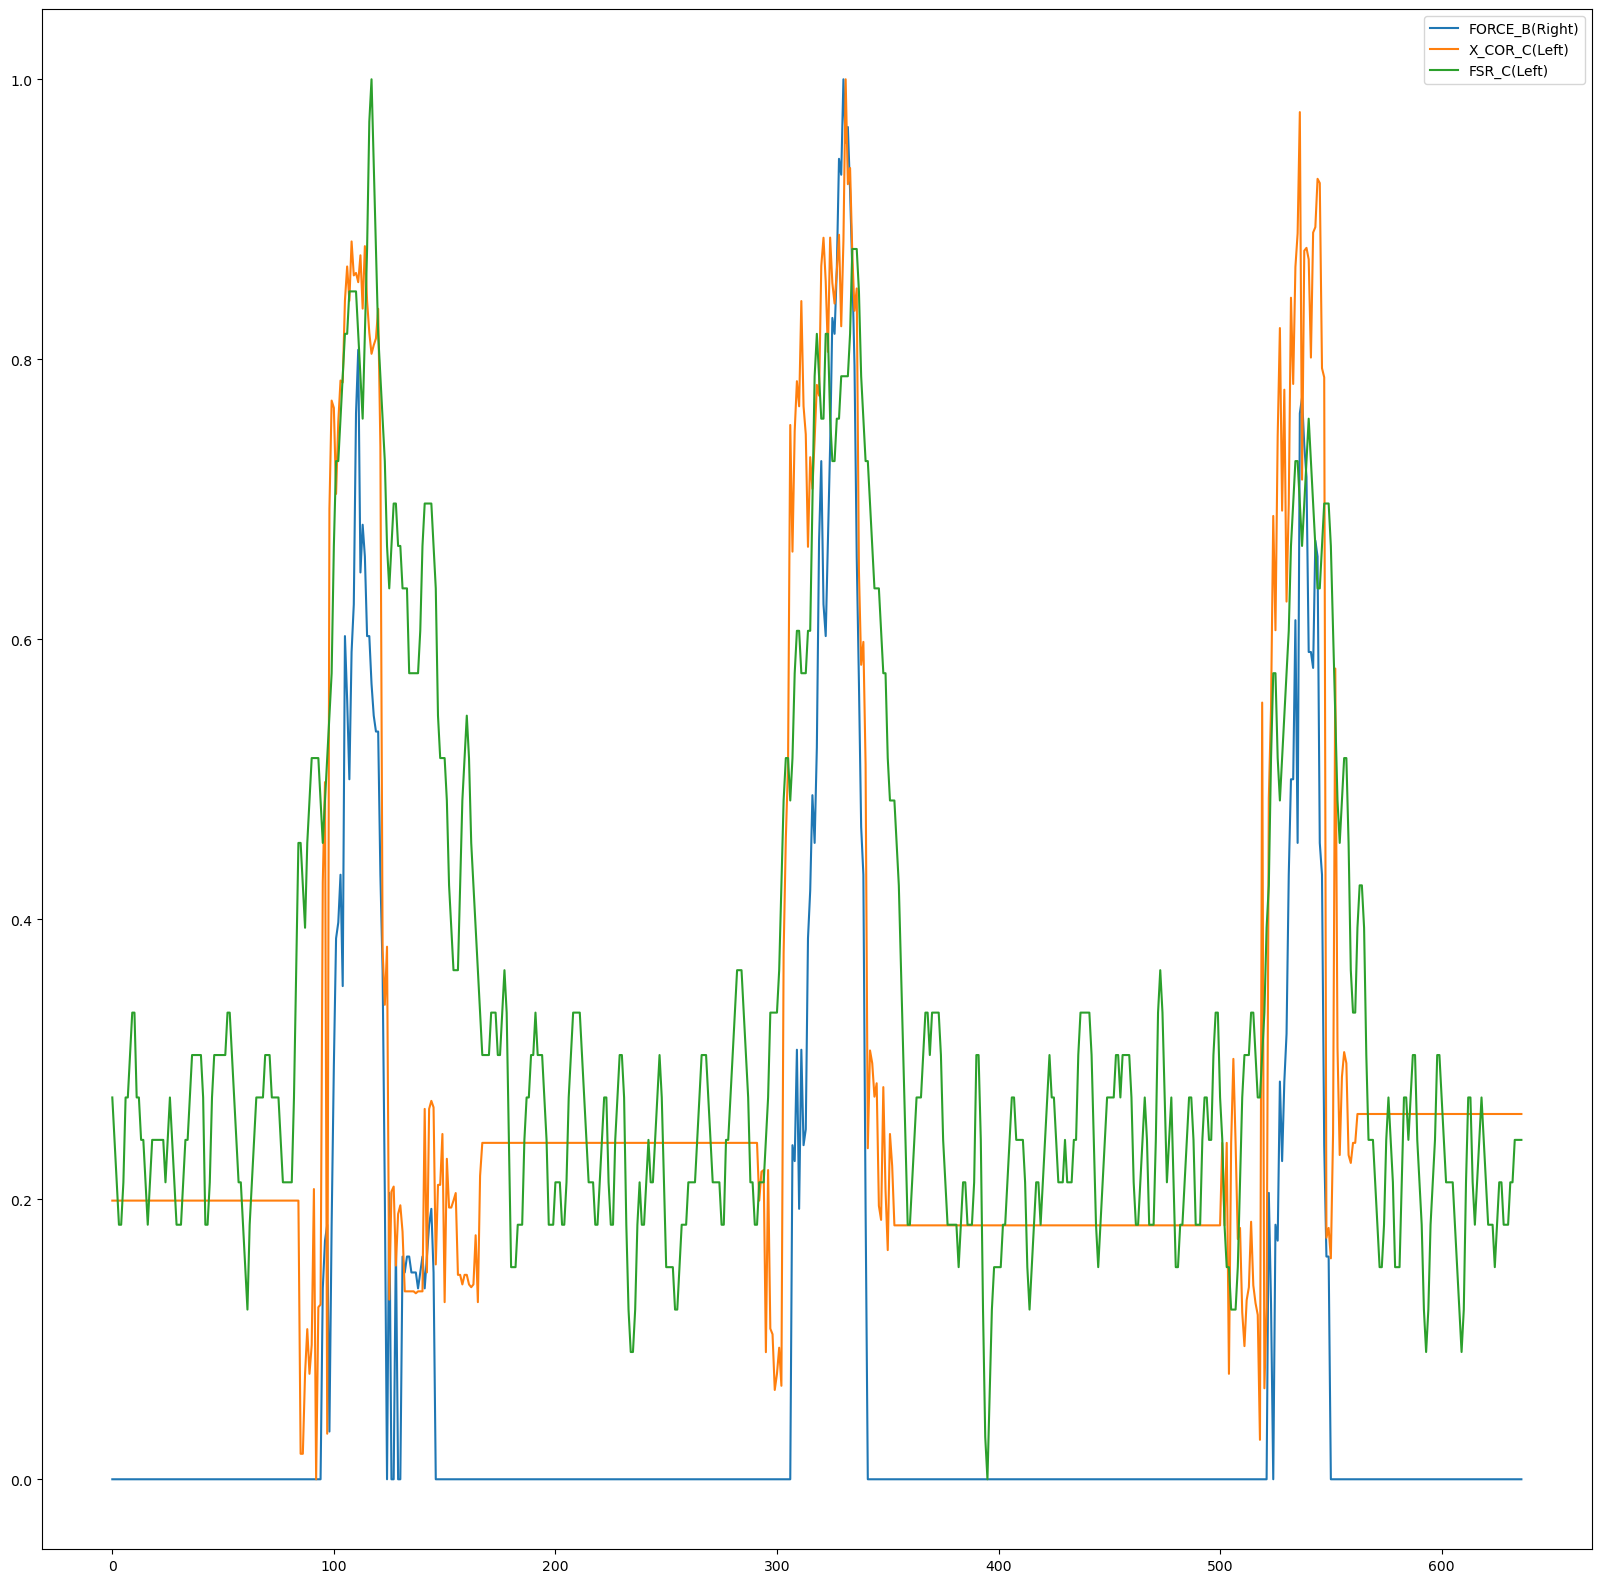

In [50]:
data_main.plot(figsize=(20,20))

<Axes: >

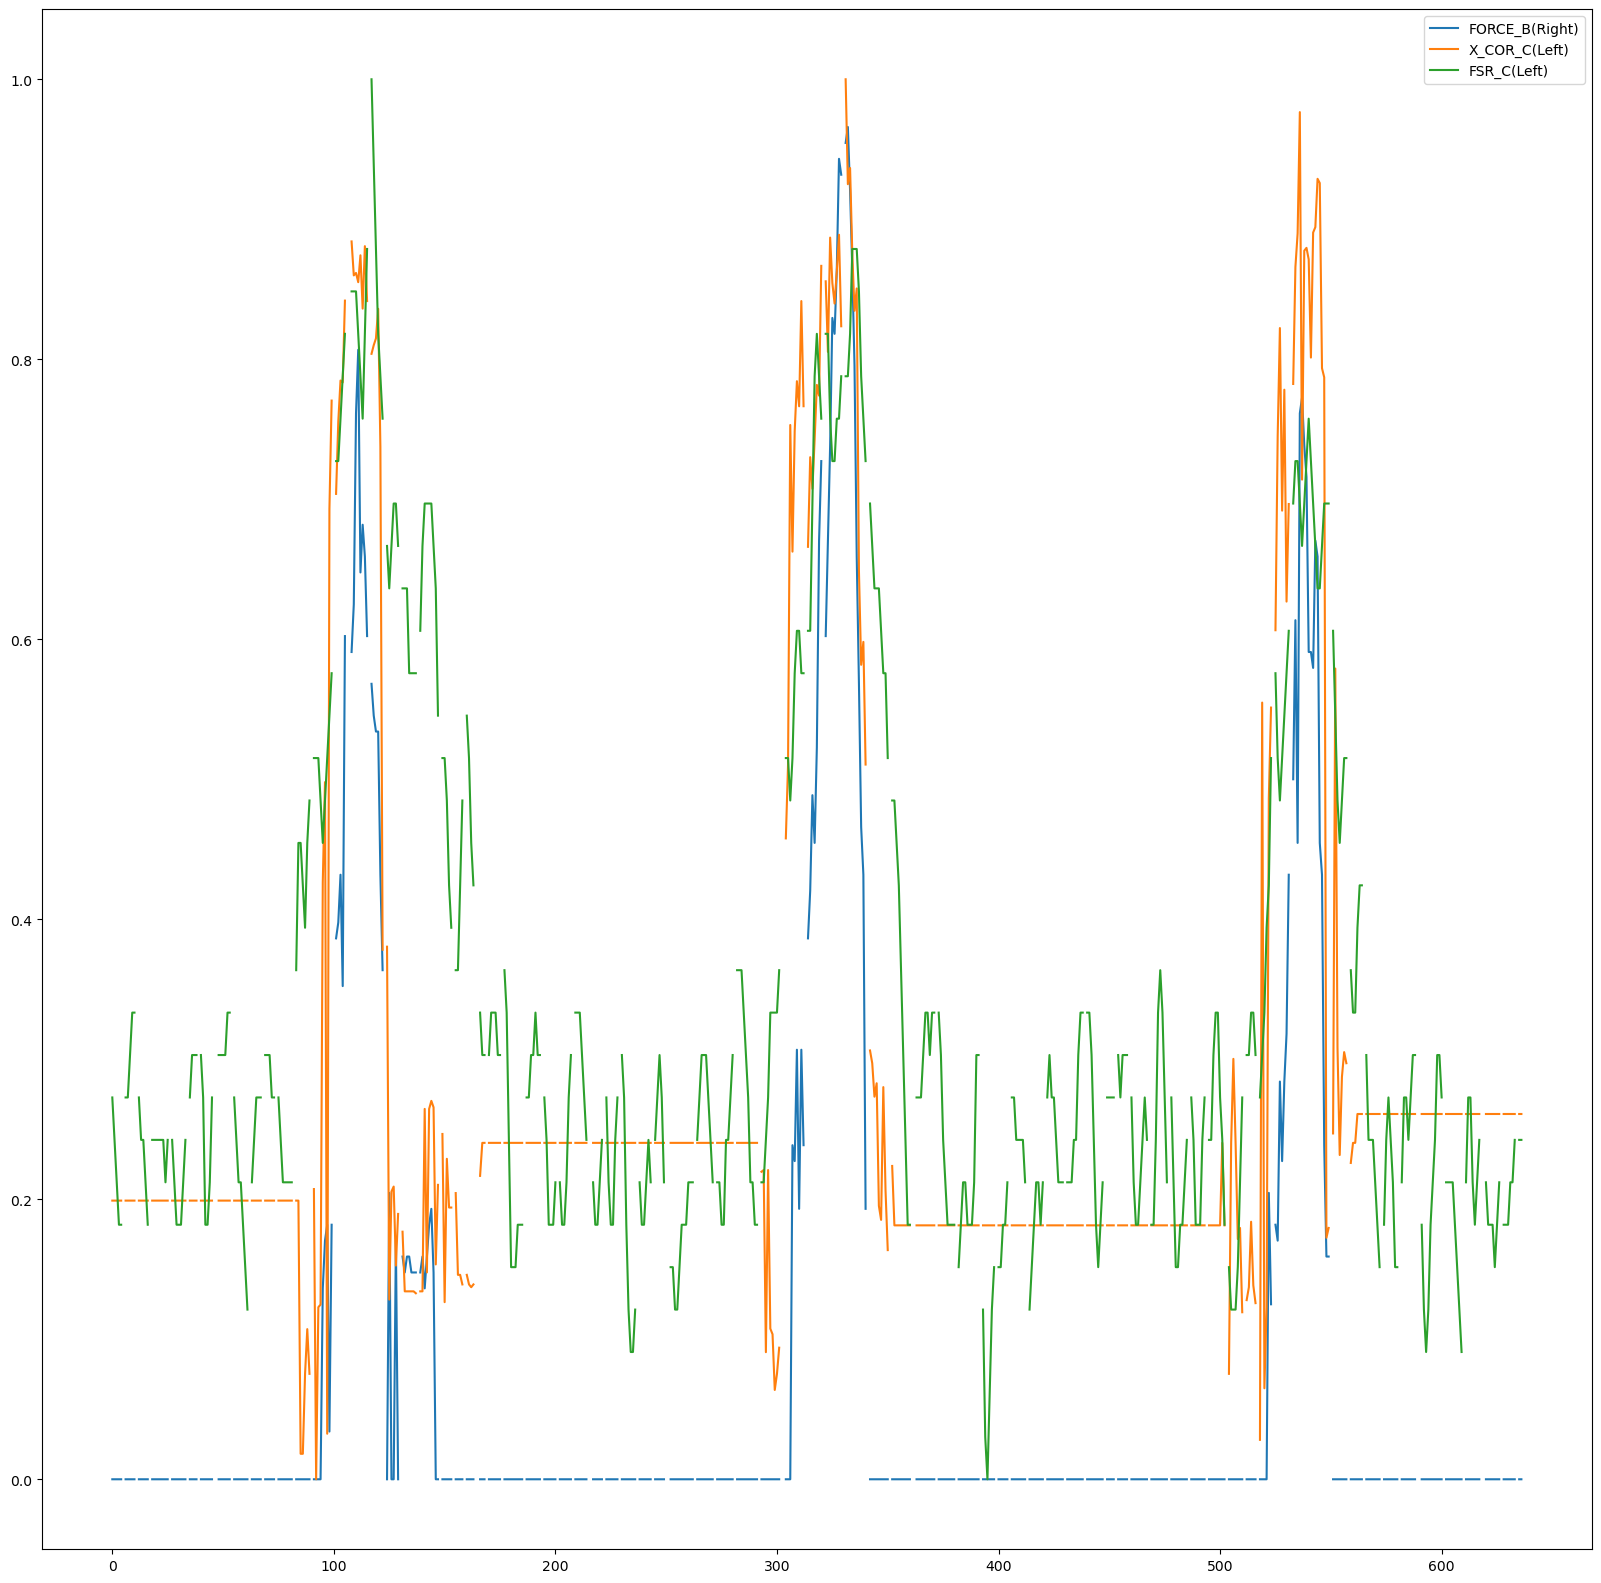

In [51]:
data.plot(figsize=(20,20))

In [52]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)    87
X_COR_C(Left)     87
FSR_C(Left)       87
dtype: int64
FORCE_B(Right)    0
X_COR_C(Left)     0
FSR_C(Left)       0
dtype: int64


FORCE_B(Right)


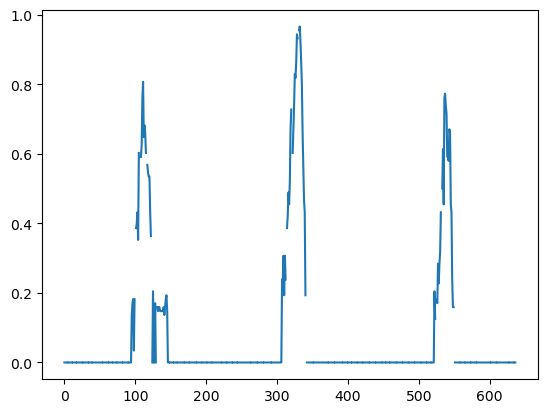

X_COR_C(Left)


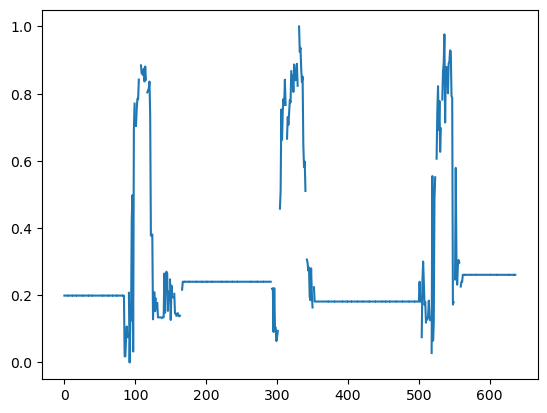

FSR_C(Left)


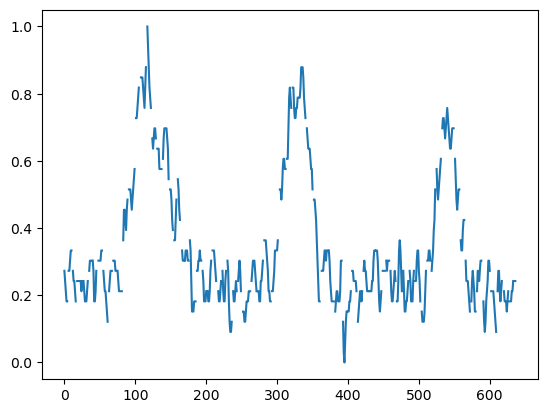

In [53]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [54]:
## R_FORCE_B : FORCE_C(Left),
## R_FORCE_B : Force_C(Left).1

In [55]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.23/STS/STS_data_main.xlsx")





In [56]:
data_sca.columns

Index(['Unnamed: 0', 'FORCE_B(Right)', 'X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [57]:
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)"],inplace=True)

In [58]:
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(data_sca)
L_scaled=pd.DataFrame(data=R_scaled)

L_new=L_scaled.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")


R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['X_COR_C(Left)','FSR_C(Left)']]


<Axes: >

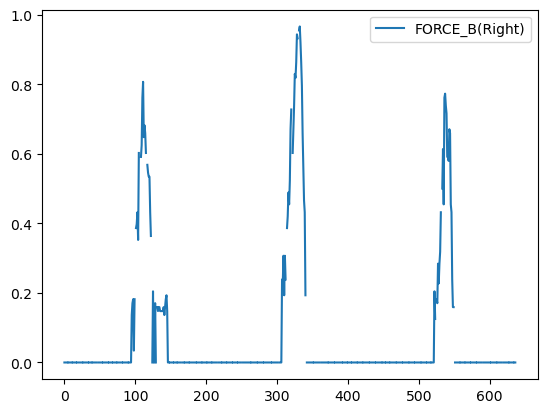

In [59]:
R.plot()

<Axes: >

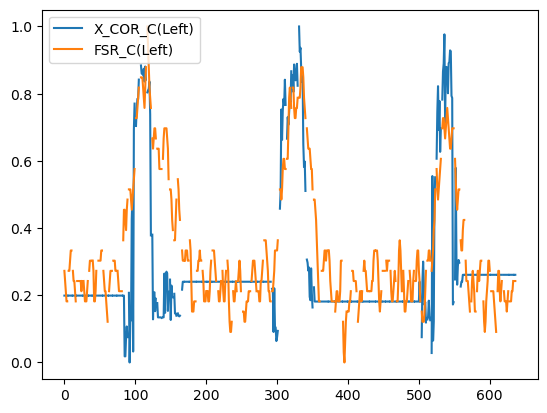

In [60]:
L.plot()

In [61]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)


In [62]:
index=L.index

loss_index_L_XCOR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_XCOR_C=np.setdiff1d(index,loss_index_L_XCOR_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [63]:
## R_FORCE_B : L_XCOR_C
##  R_FORCE_B : L_FSR_C 

In [64]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_XCOR_C=L.iloc[normal_index_L_XCOR_C,0]
x_test_L_XCOR_C=loss_index_L_XCOR_C

y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_XCOR_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [65]:
print(x_train_R_FORCE_B.shape)
print(y_train_L_XCOR_C.shape)

(550, 1)
(550,)


In [66]:
print(x_test_L_XCOR_C.shape)
print(x_test_L_FSR_C.shape)

(87, 1)
(87, 1)


In [67]:
#[I 2023-11-25 05:39:37,950] Trial 25 finished with value: 0.017313334060267634 and parameters: {'batch_size': 70, 'steps_per_epoch': 7, 'epochs': 9571, 'filter': 149, 'lstm_par1': 127, 'lstm_par2': 151, 'lstm_par3': 215, 'dense_par': 150, 'dense_par1': 124, 'dense_par2': 189, 'dense_par3': 136, 'dim1': 8, 'dim2': 2, 'dim3': 9, 'dim4': 7}. Best is trial 25 with value: 0.017313334060267634.
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()
model.fit(x_train_R_FORCE_B,y_train_L_XCOR_C)
pred=model.predict(x_test_L_XCOR_C)
pred=pred.reshape(-1,1)

In [69]:
c=0
for i in loss_index_L_XCOR_C:    
    L_XCOR_C[i]=pred[c]
    c+=1

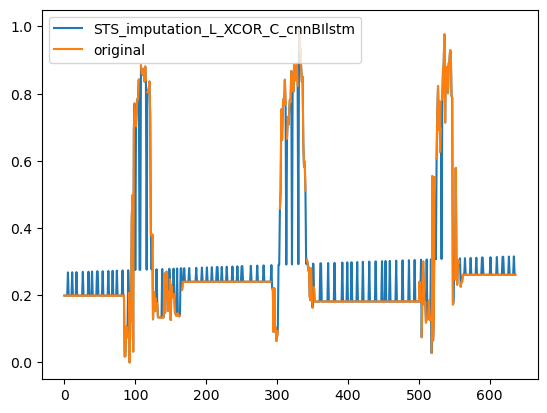

In [70]:
import matplotlib.pyplot as plt 
plt.plot(L_XCOR_C,label='STS_imputation_L_XCOR_C_cnnBIlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [25]:
#[I 2023-11-24 09:34:35,935] Trial 4 finished with value: 0.161011620863733 and parameters: {'batch_size': 16, 'steps_per_epoch': 8, 'epochs': 9446, 'filter': 45, 'lstm_par1': 117, 'lstm_par2': 167, 'dense_par': 119, 'dense_par1': 185, 'dense_par2': 103, 'dense_par3': 109, 'dim1': 3, 'dim2': 6, 'dim3': 3, 'dim4': 1}. Best is trial 4 with value: 0.161011620863733.


In [71]:
model = LinearRegression()
model.fit(x_train_R_FORCE_B,y_train_L_FSR_C)

LinearRegression()

In [72]:
pred=model.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

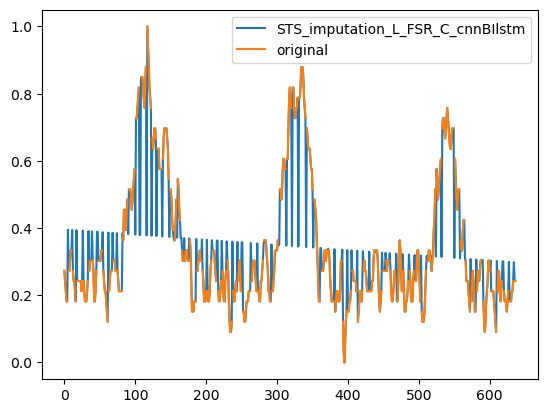

In [73]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='STS_imputation_L_FSR_C_cnnBIlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [74]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['X_COR_C(Left)'],L_XCOR_C))
print(RMSE(data_main['FSR_C(Left)'],L_FSR_C))

0.07135134418231424
0.0682501325090306


In [75]:
L.columns

Index(['X_COR_C(Left)', 'FSR_C(Left)'], dtype='object')

In [76]:
L=data.loc[:,['X_COR_C(Left)','FSR_C(Left)']]

In [77]:
L.isnull().sum()

X_COR_C(Left)    87
FSR_C(Left)      87
dtype: int64

In [78]:
for i in loss_index_L_XCOR_C:    
    L['X_COR_C(Left)'][i]=L_XCOR_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR_C(Left)'][i]=L_FSR_C[i]

In [79]:
L.isnull().sum()

X_COR_C(Left)    0
FSR_C(Left)      0
dtype: int64

<Axes: >

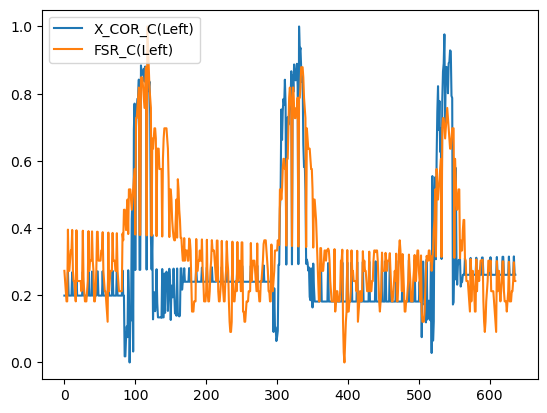

In [80]:
L=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L.plot()

<Axes: >

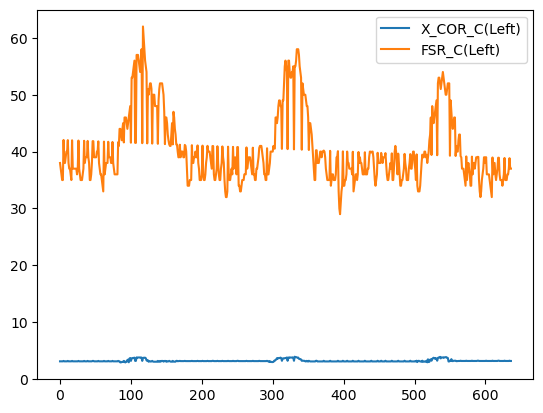

In [81]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["X_COR_C(Left)","FSR_C(Left)"],axis="columns")
L_sca.plot()